# 0. Setup

In [1]:
# Import das bibliotecas que vamos estar ultilizando: 

import os
import tarfile
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Onde salvar as figuras:

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "image", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. Fazendo download dos dados que iremos usar:

In [3]:
# Definindo caminho para salvamento:

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Definindo a nossa função para extração dos dados

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    """
    Cria uma função com dois argumentos:
    
    - housing_url = Local online de onde esses dados vem, são baixados.
    - housing_path = Local na sua máquina onde esses arquivos serão salvos (considerando o seu virtualenv)

    Essa função essencialmente vai verrificar se a pasta já foi criada localmente, caso não tenha sido criada, ela vai criar, baixar o arquivo compactado e descompactar.

    """
    if not os.path.isdir(housing_path): # Condicional para saber se a pasta já foi criada
        os.makedirs(housing_path) # Se a pasta não foi criada, crie a pasta por meio do makedirs! 
    tgz_path = os.path.join(housing_path, "housing.tgz") # Define o caminho para o seu arquivo tgz ser baixado, com base no housing path!
    urllib.request.urlretrieve(housing_url, tgz_path) # Baixa o arquivo online com base no housing url! 
    housing_tgz = tarfile.open(tgz_path) # Abre o arquivo baixado, compactado! 
    housing_tgz.extractall(path=housing_path) # Extrai tudo dentro do arquivo compactado! 
    housing_tgz.close() # Fecha o arquivo compactado para salvar memória.

In [4]:
# Fazendo a extração dos dados, usando a nossa função criada anteriormente:

fetch_housing_data()

C:\Users\dudou\AppData\Local\Temp\ipykernel_18568\1400792732.py:24: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path) # Extrai tudo dentro do arquivo compactado!


In [5]:
# Carregandos os dados usando o Pandas:

"""
    Função simples que carrega nosso Dataframe em csv com um único argumento:
    
    - housing_path = Local na sua máquina onde esses arquivos já estão salvos (considerando o seu virtualenv)! Salvos na função anterior.

"""

def load_housing_data(housing_path=HOUSING_PATH): # dando nome a função e pedindo argumento.
    csv_path = os.path.join(housing_path, "housing.csv") # Relembra a maquina o caminho para o arquivo csv ser lido! 
    return pd.read_csv(csv_path) # Retorna o nosso dataframe lido! 

load_housing_data()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### Dataset: California Housing — Explicação das Colunas

Este dataset representa regiões da Califórnia.  
Cada linha corresponde a um distrito censitário, e não a uma casa individual.

---

## `longitude`

Representa a posição geográfica no eixo leste–oeste.

Valores negativos indicam localização no hemisfério oeste.  
Quanto mais próximo de -122, mais próximo do oceano Pacífico.

Essa variável é importante para análises espaciais e influencia diretamente o valor dos imóveis.

---

## `latitude`

Representa a posição geográfica no eixo norte–sul.

Em conjunto com a longitude, permite localizar cada região no mapa da Califórnia.

É amplamente utilizada em visualizações geográficas e modelos que capturam padrões espaciais.

---

## `housing_median_age`

Idade mediana das casas da região.

Não representa a idade de uma casa específica, mas sim a mediana das construções do distrito.

Regiões mais antigas ou mais novas tendem a apresentar padrões diferentes de valorização.

---

## `total_rooms`

Quantidade total de cômodos existentes na região.

Esse valor é agregado, somando todos os cômodos de todas as casas do distrito.

Geralmente é utilizado em conjunto com outras variáveis para gerar métricas normalizadas.

---

## `total_bedrooms`

Número total de quartos existentes na região.

Pode conter valores ausentes.

É frequentemente usado para calcular proporções, como quartos por domicílio.

---

## `population`

População total da região.

Representa o número de pessoas que vivem no distrito.

É útil para análises de densidade populacional e impacto urbano.

---

## `households`

Número total de domicílios na região.

Um domicílio representa uma residência, independentemente do número de moradores.

É utilizado como base para normalizações e criação de novas variáveis.

---

## `median_income`

Renda mediana da região, medida em dezenas de milhares de dólares.

Exemplo:
- Valor 8.5 representa aproximadamente 85.000 dólares por ano.

É uma das variáveis mais importantes do dataset e possui forte correlação com o valor dos imóveis.

---

## `median_house_value`

Valor mediano dos imóveis da região.

Esta é a variável alvo do modelo de Machine Learning.

O dataset possui um teto máximo de 500.000 dólares, o que gera um corte artificial nos valores mais altos.

---

## `ocean_proximity`

Variável categórica que indica a proximidade da região em relação ao oceano.

Valores possíveis:
- NEAR BAY  
- NEAR OCEAN  
- <1H OCEAN  
- INLAND  
- ISLAND  

Essa variável tem forte influência no valor dos imóveis, já que regiões próximas ao oceano tendem a ser mais valorizadas.


# 2. Dando uma rápida olhada nos dados:

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Repare que nenhuma das colunas possuem valores nulos, se fosse o caso, seria necessária uma investigação mais profunda!
# Vamos dar umaolhada na coluna ocean_proximity, que é a única que não é numérica do tipo float:

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


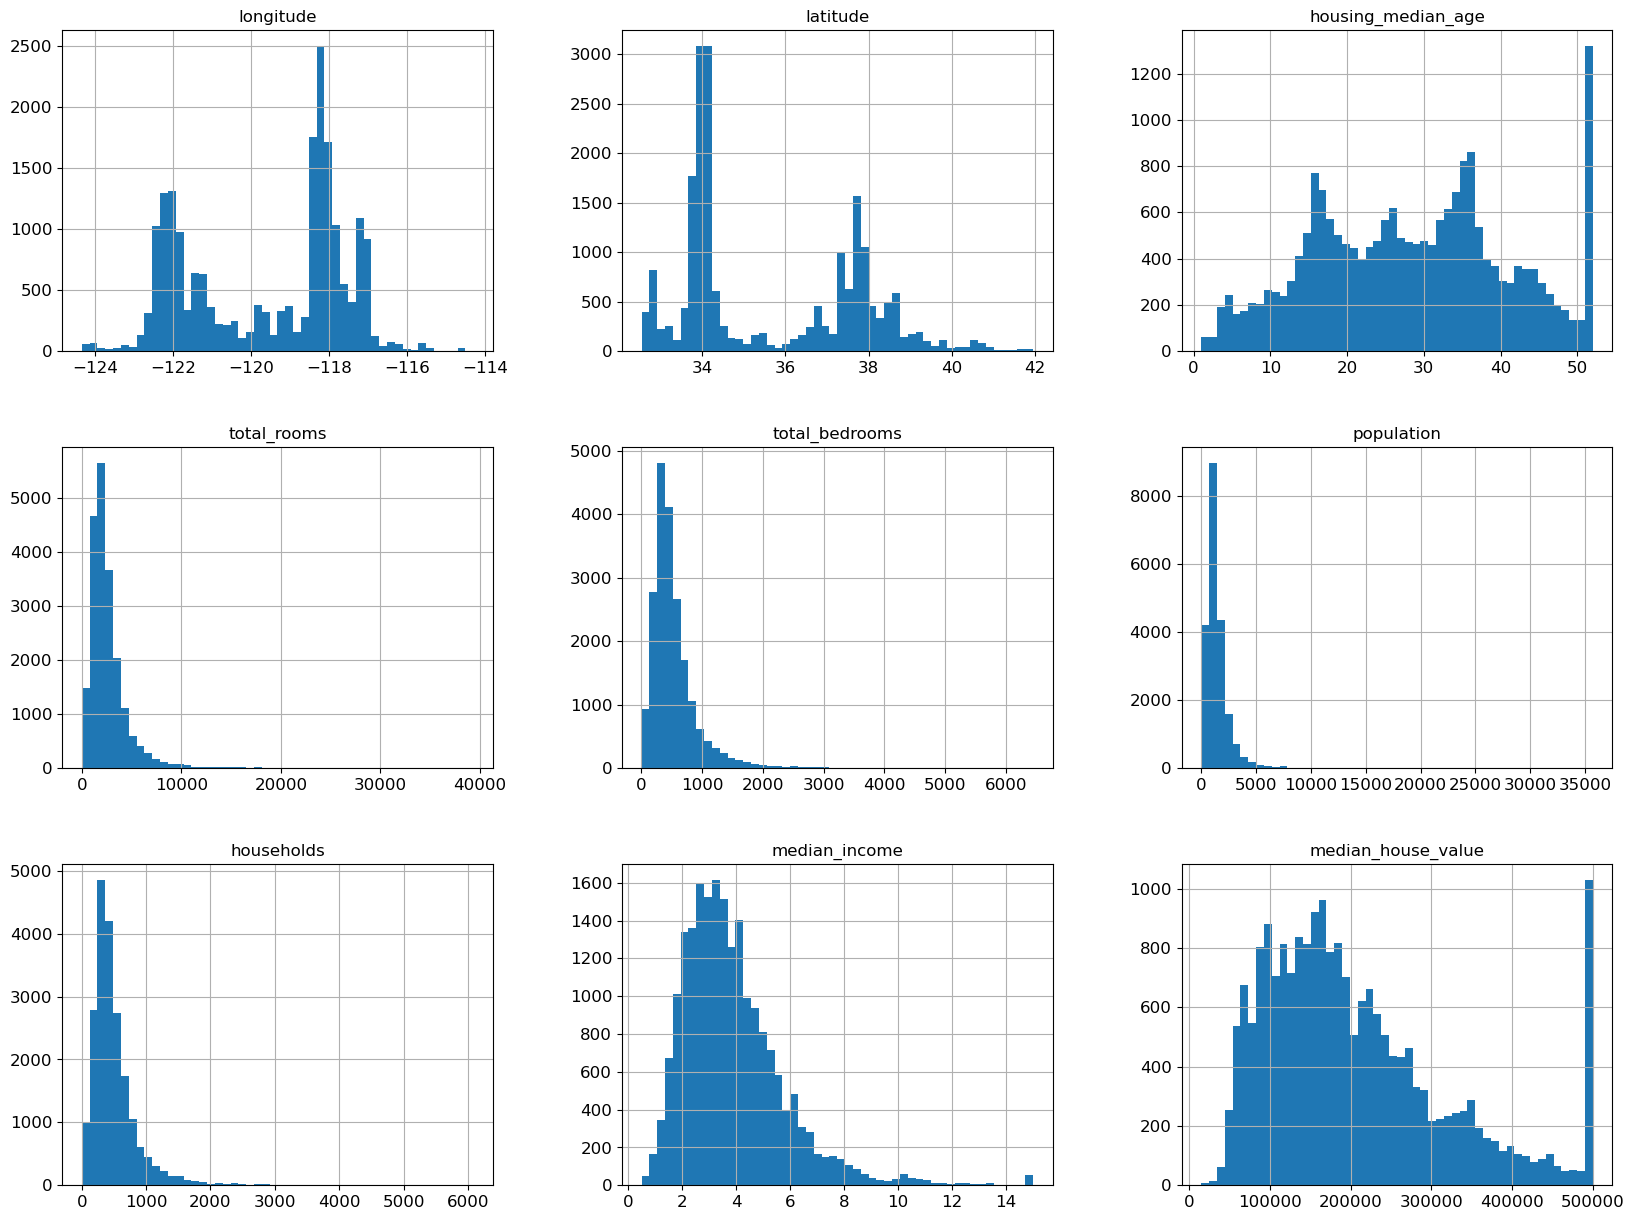

In [10]:
# Plotando um histograma para entender a distribuição desses gráficos:
housing.hist(bins= 50, figsize = (20,15))
plt.show()

# 3. Criando um conjunto de testes:

In [11]:
# Essa forma de divisão tem diversos problemas, então vamos voltar para a mais funcional usando o sklearn:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [12]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

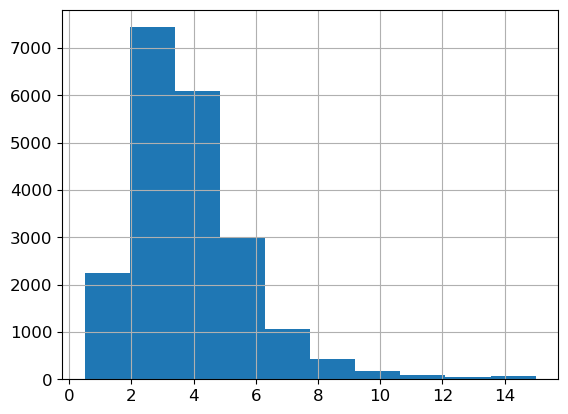

In [13]:
housing["median_income"].hist()

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [15]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

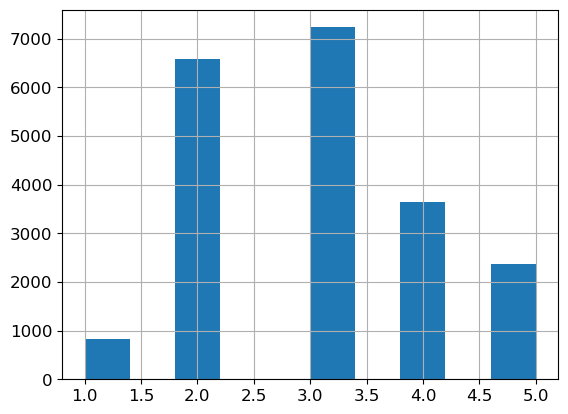

In [16]:
housing["income_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [19]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [20]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [21]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 4. Analise Exploratória dos dados:

In [25]:
# Criando uma cópia do conjunto completo:

housing = strat_train_set.copy()

## 4.1 Vendo dados geográficos:

<Axes: xlabel='longitude', ylabel='latitude'>

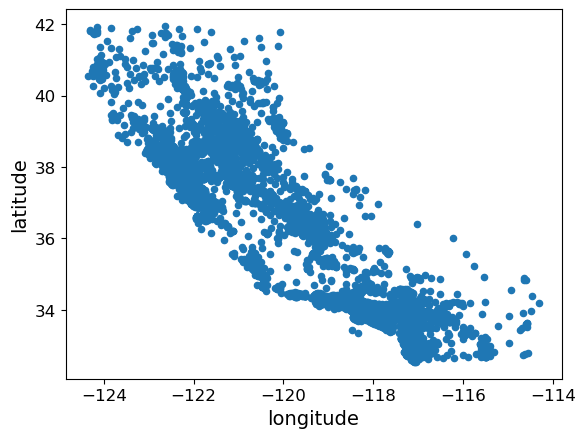

In [26]:
housing.plot(kind = 'scatter', x= 'longitude', y = 'latitude')

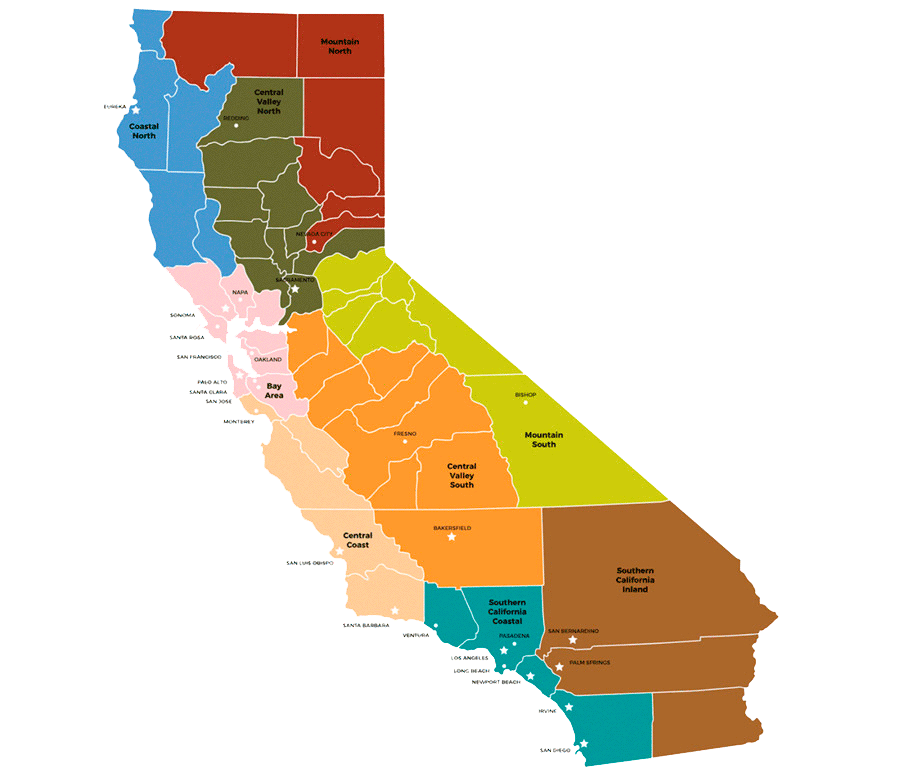

<Axes: xlabel='longitude', ylabel='latitude'>

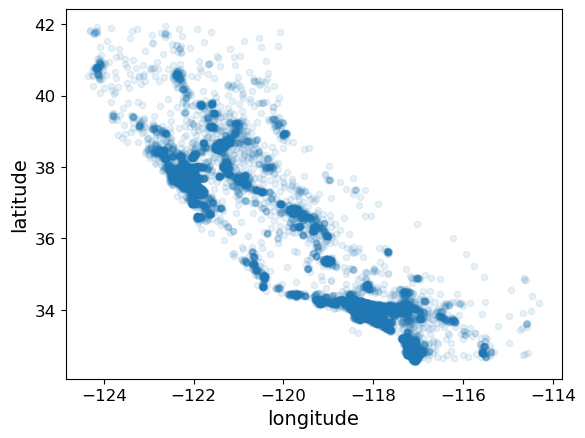

In [27]:
housing.plot(kind = 'scatter', x= 'longitude', y = 'latitude', alpha = 0.1)

Saving figure housing_prices_scatterplot


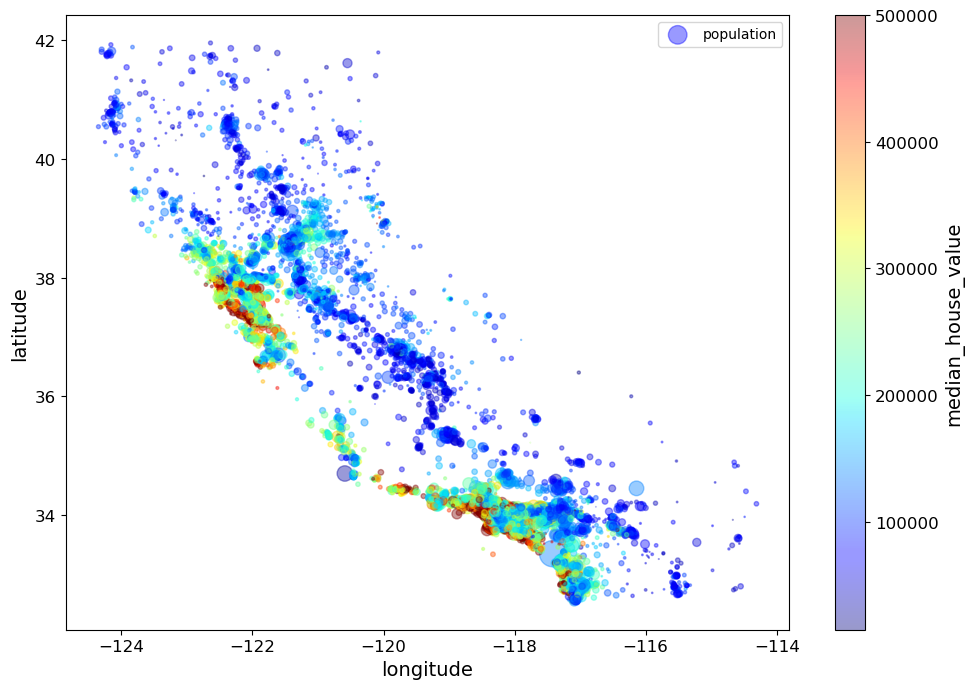

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [29]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1b76a717bb0>)

Saving figure california_housing_prices_plot


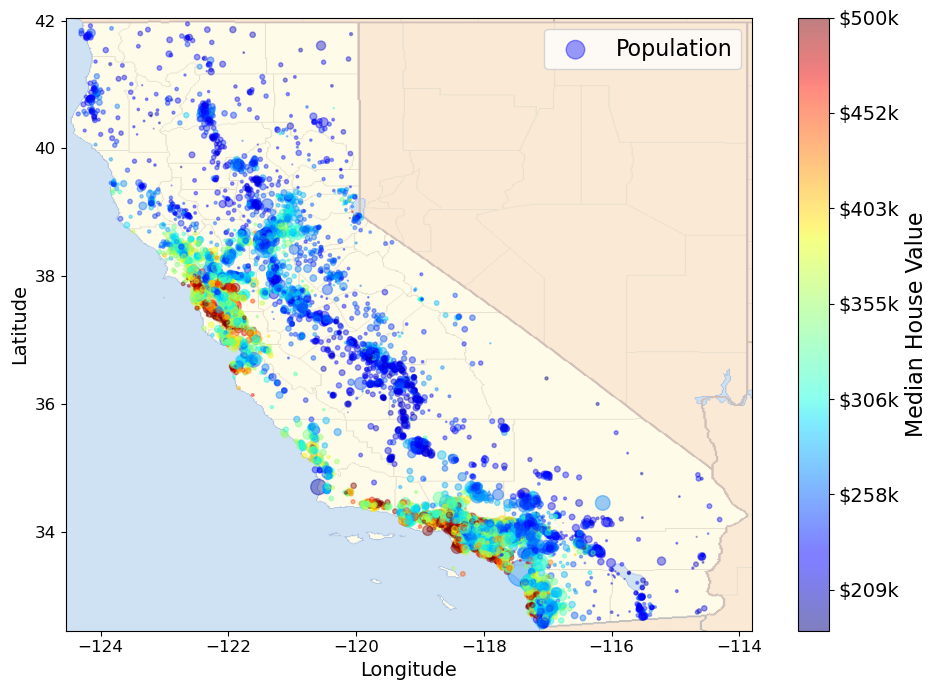

In [30]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## 4.2 Buscando correlações:

In [34]:
corr_matrix = housing.select_dtypes(include=['number']).corr()

In [35]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


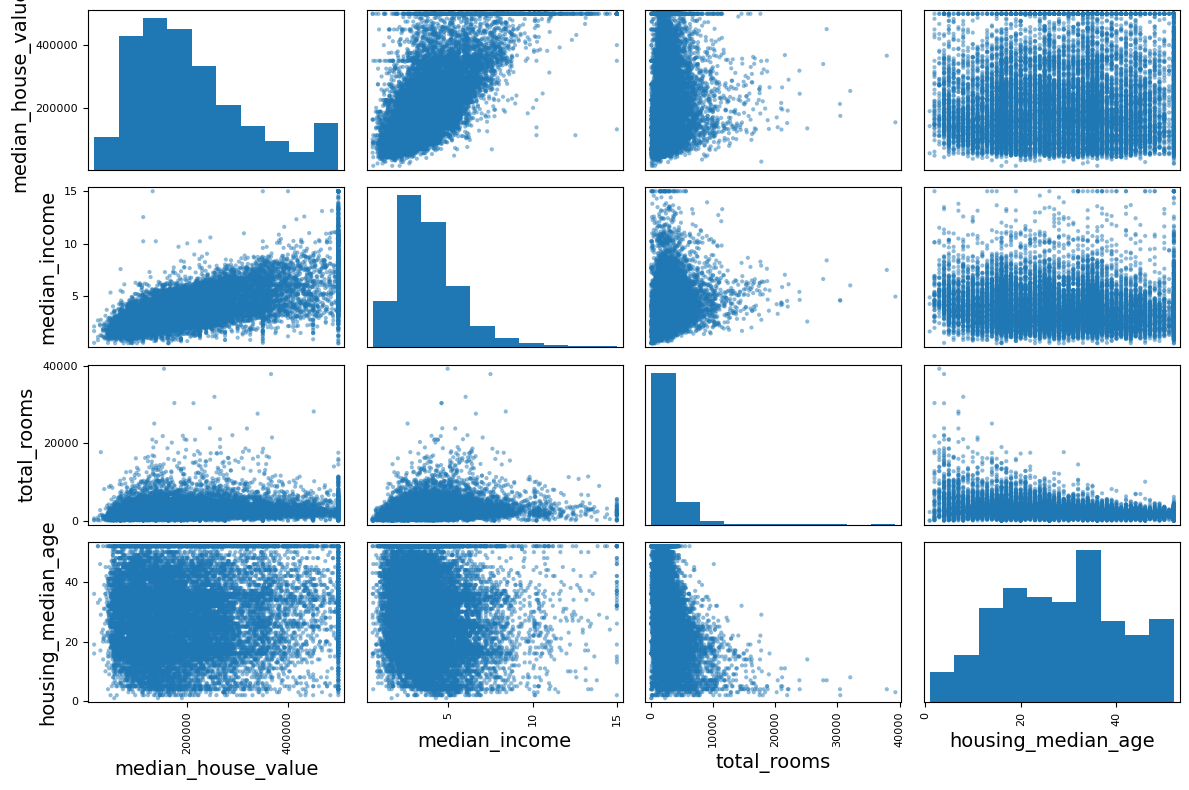

In [36]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


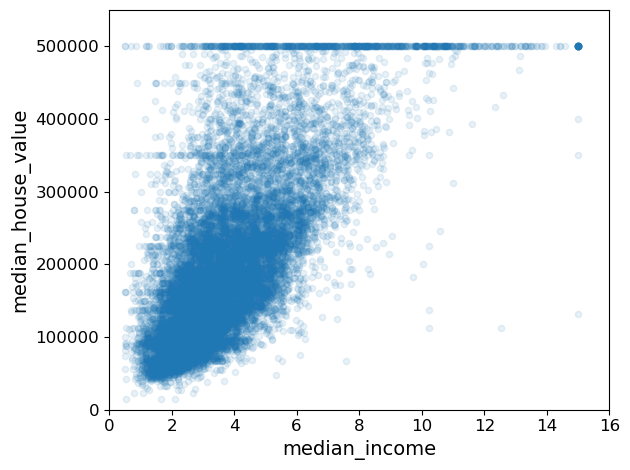

In [37]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

## 4.3 Testando combinações de atributos:

In [40]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [42]:
corr_matrix = housing.select_dtypes(include=['number']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64